In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from cleaner import clean_dataframe, DBSCAN_outlier_identifier


In [55]:
color_blue = "#1a559e"
color_blue_vivid = "#0070c0"
color_blue_light = "dodgerblue"
color_pink = "#e71d71"
color_black = "black"
color_gold = "#FFD700"
color_orange = "orange"
color_red = "darkred"


In [56]:
# Import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Bankrupt.csv')
df = clean_dataframe(df)


In [57]:
# Separate the target variable 'Bankrupt?' and the features
y = df['Bankrupt?']
X = df.drop(columns=['Bankrupt?'])

In [58]:
# Get the majority class samples (where y == 0)
X_majority = X[y == 0]
majority_outliers = DBSCAN_outlier_identifier(X_majority, eps=1, min_samples=5)
outliers = np.zeros(len(X), dtype=bool)
outliers[y == 0] = majority_outliers
X = X[~outliers]
y = y[~outliers]


Percentage of outliers: 42.55%


In [59]:
# Create data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [60]:
# Standardize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [61]:
# Create SelectKBest selector with f_classif scoring function
selector = SelectKBest(score_func=f_classif, k=8)

# Fit the selector on the training data
selector.fit(X_train, y_train)
selected_features_mask = selector.get_support()

# Get the names of selected features
feature_names_selectk = X_train.columns[selector.get_support()]

# Transform training and test data to include only selected features
X_train_selectk = X_train[feature_names_selectk]
X_test_selectk = X_test[feature_names_selectk]

X_train_selectk


,Net Value Per Share (A),Debt ratio %,Operating Profit Rate,Cash Flow to Total Assets,Net Income to Stockholder's Equity,Operating Profit Growth Rate,Cash Flow to Sales,Continuous Net Profit Growth Rate
0,1.551037,-1.963197,-0.038301,-0.414748,0.056452,-0.040153,-0.408084,0.007358
1,1.456763,-1.485307,0.052881,0.368392,0.035414,-0.011565,0.286047,0.003274
2,0.888816,-0.309838,1.164274,0.641439,0.106107,-0.003314,1.181334,0.015608
3,1.813167,-0.589501,0.492879,0.150026,0.124171,0.033553,0.084723,0.026718
4,1.187735,-1.097061,0.169010,0.670083,0.099184,-0.011140,0.731727,0.069385
...,...,...,...,...,...,...,...,...
3203,0.456532,-1.236577,-0.645180,-0.584253,0.021799,-0.161095,-0.519208,0.009328
3204,0.194403,0.397843,-0.031419,-0.024508,0.023832,0.001326,-0.038016,0.009148
3205,0.764649,-1.139989,0.060623,0.450116,0.036138,-0.007094,0.181239,0.012871
3206,-0.226384,1.242515,-0.147118,-0.125174,-0.037859,-0.023678,-0.070337,-0.099932


              precision    recall  f1-score   support

           0       0.98      0.84      0.91       759
           1       0.22      0.77      0.35        44

    accuracy                           0.84       803
   macro avg       0.60      0.81      0.63       803
weighted avg       0.94      0.84      0.88       803

[[641 118]
 [ 10  34]]


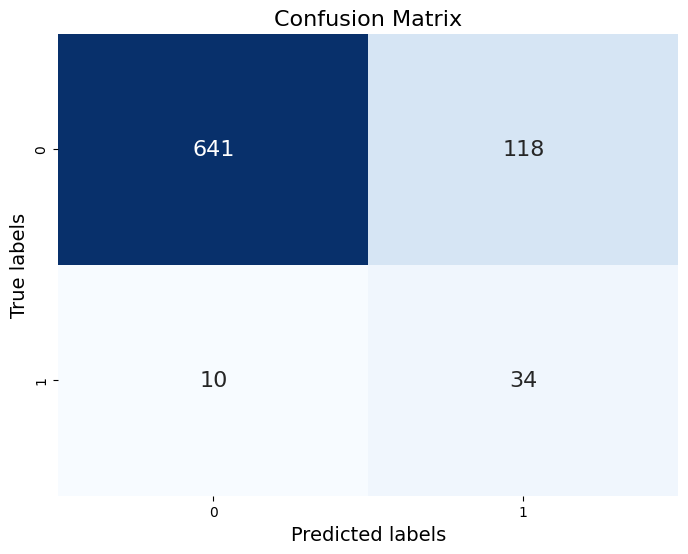

In [62]:
# Apply logistic regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_selectk, y_train)

# Predict the test set
y_pred = logreg.predict(X_test_selectk)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


# Principal Components Analysis

In [63]:
# apply pca
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train_selectk.shape[1])
X_train_pca = pca.fit_transform(X_train_selectk)
X_test_pca = pca.transform(X_test_selectk)

x_new_cols = X_train_selectk.columns



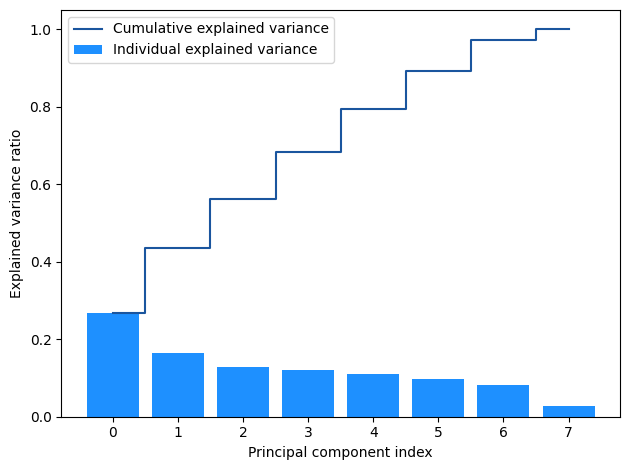

In [64]:
# Explained variance ratio
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Individual explained variance', color=color_blue_light)
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', color=color_blue)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       759
           1       0.22      0.77      0.35        44

    accuracy                           0.84       803
   macro avg       0.60      0.81      0.63       803
weighted avg       0.94      0.84      0.88       803

[[641 118]
 [ 10  34]]


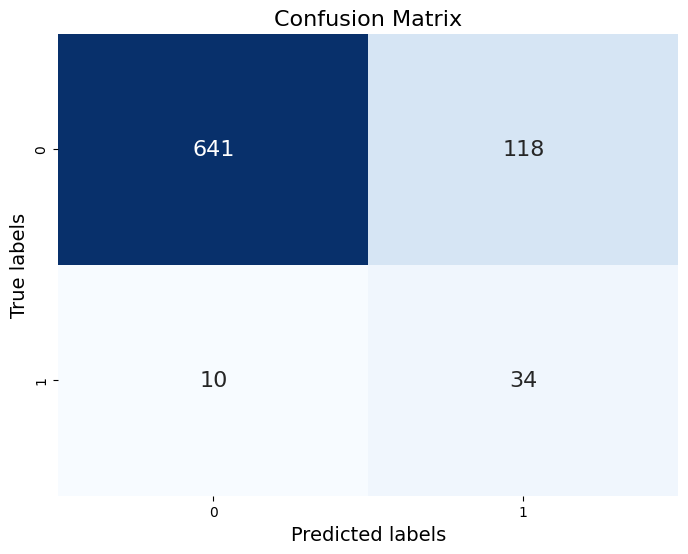

In [65]:

# Apply logistic regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_pca, y_train)

# Predict the test set
y_pred = logreg.predict(X_test_pca)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 16})
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()


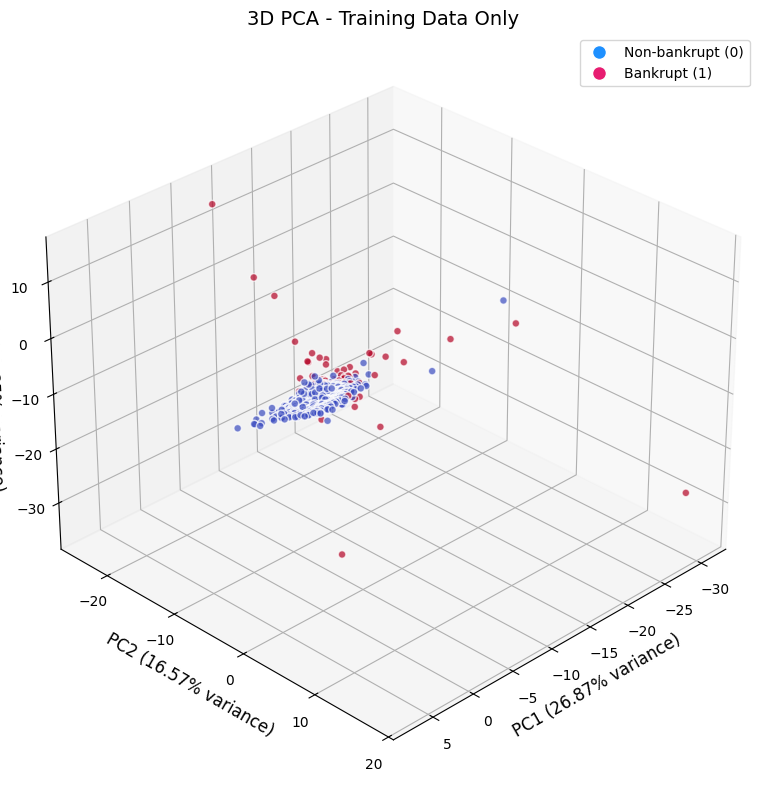

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Use only training data for visualization
X_pca_train = X_train_pca[:, :3]  # Take only first 3 principal components

# Create a scatter plot with different colors for default vs non-default
scatter = ax.scatter(
    X_pca_train[:, 0], 
    X_pca_train[:, 1], 
    X_pca_train[:, 2],
    c=y_train, 
    cmap=plt.cm.coolwarm,
    alpha=0.7,
    edgecolors='w',
    s=30
)

# Add a color bar to indicate what's what

# Set labels for axes
ax.set_xlabel(f'PC1 ({exp_var_pca[0]:.2%} variance)', fontsize=12)
ax.set_ylabel(f'PC2 ({exp_var_pca[1]:.2%} variance)', fontsize=12)
ax.set_zlabel(f'PC3 ({exp_var_pca[2]:.2%} variance)', fontsize=12)

# Add a title
plt.title('3D PCA - Training Data Only', fontsize=14)

# Add a legend with custom elements
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_blue_light, 
              label='Non-bankrupt (0)', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_pink, 
              label='Bankrupt (1)', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right')

# Rotate the plot for better visualization
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()
